In [315]:
import pandas as pd,csv
# # define the dataset location
# filename2 = '/Users/pushpanb/Downloads/Second Sem/Machine Learning/bank/bank-full.csv'
# #Open the file
# data2 = open(filename2,'r')


# df2 = pd.DataFrame(data=data2).T
df = pd.read_excel (r'/Users/pushpanb/Downloads/Second Sem/Machine Learning/AdultData/Adult_data.xlsx')
df.columns = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship',
             'race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']


            
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [316]:
df.columns.tolist

<bound method IndexOpsMixin.tolist of Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')>

In [317]:
df['income'].value_counts()

<=50K    24719
>50K      7841
Name: income, dtype: int64

In [318]:
df.info()
#to find the null values in each columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education-num   32560 non-null  int64 
 5   marital-status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital-gain    32560 non-null  int64 
 11  capital-loss    32560 non-null  int64 
 12  hours-per-week  32560 non-null  int64 
 13  native-country  32560 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [319]:
df.isnull().sum()
#to check the null values

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [320]:
df['income'].unique()
#checcking the unique value for a column


array(['<=50K', '>50K'], dtype=object)

In [321]:
df['income'].value_counts()
#to check the imbance of the response variable

<=50K    24719
>50K      7841
Name: income, dtype: int64

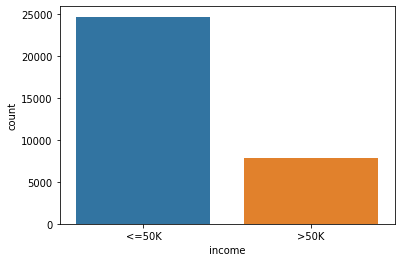

In [322]:
import seaborn as sns
import matplotlib.pyplot as plot
sns.countplot(x = 'income', data = df)
plot.show()

to fit the model we need to do the smort process 

In [323]:
df.drop('fnlwgt', axis=1,inplace = True)
#droping the dummy column

In [324]:
df.groupby('income').mean()

,age,education-num,capital-gain,capital-loss,hours-per-week
income,,,,,
<=50K,36.783648,9.594927,148.670537,53.145071,38.840163
>50K,44.249841,11.611657,4006.142456,195.001530,45.473026


Here we can see that age group below 36 has income less than or equal to 50K and age group more than 44 have avarerage income more than 50K

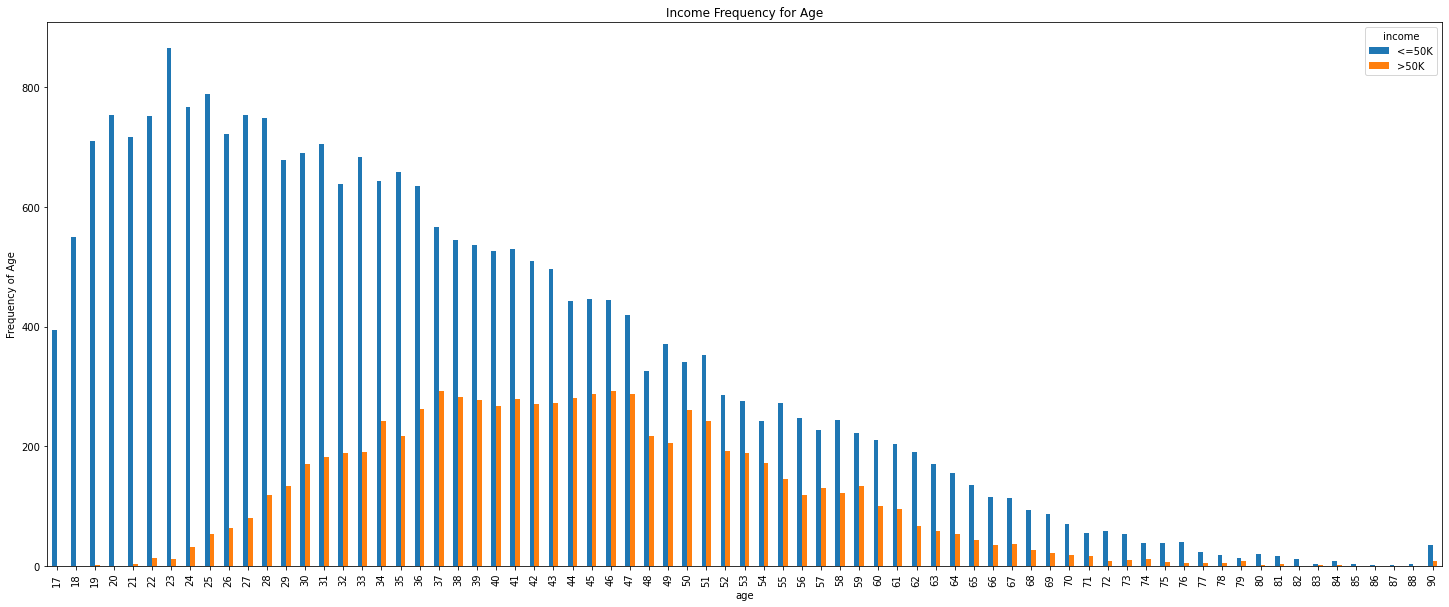

In [325]:
# pd.plot(figsize=(10,16))
pd.crosstab(df.age,df.income).plot(kind='bar',figsize=(25,10))
plot.title('Income Frequency for Age')
plot.xlabel('age')
plot.ylabel('Frequency of Age')
plot.show()

<AxesSubplot:>

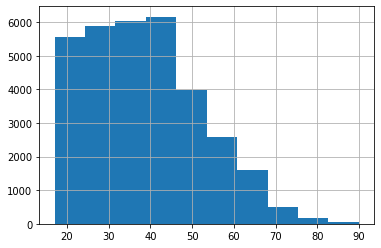

In [326]:
df.age.hist()

In [327]:
df.dtypes.value_counts()

object    9
int64     5
dtype: int64

In [328]:
# for i in df.columns.tolist():
#     df[i] = df[i].astype('category').cat.codes
#     #Encoding

In [329]:
df.education.unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

In [330]:
df['education'] = df['education'].replace({'9th': 'primary'})

In [331]:
list1 = ["Preschool","1st-4th","5th-6th","7th-8th", "9th","10th","11th","12th"]

In [332]:
for lit in list1:
    df['education'] = df['education'].replace({lit: 'primary'})
    

In [333]:
df.education.unique()

array(['Bachelors', 'HS-grad', 'primary', 'Masters', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', 'Doctorate', 'Prof-school'],
      dtype=object)

In [334]:
# ordinal encoding 
scale_mapper = {"primary":0, "HS-grad":1,"Prof-school":1,
                 "Assoc-acdm":2, "Assoc-voc":2, "Some-college":2,
                 "Bachelors":3, "Masters":4,"Doctorate":5}
df["education"] = df["education"].replace(scale_mapper)

In [335]:
df.education.value_counts()

1    11077
2     9740
3     5354
0     4253
4     1723
5      413
Name: education, dtype: int64

In [336]:
df.columns.tolist()

['age',
 'workclass',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'income']

In [337]:
#Label Encoding
for i in df.columns.tolist():
    if i == 'education':
        pass
    else:
        df[i] = df[i].astype('category').cat.codes
    
    #Encoding

In [338]:
df.education.value_counts()

1    11077
2     9740
3     5354
0     4253
4     1723
5      413
Name: education, dtype: int64

In [339]:
df.corr()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
age,1.000000,0.003829,0.051133,0.036547,-0.266433,-0.020929,-0.263783,0.028751,0.088863,0.125916,0.065058,0.069123,-0.001145,0.234136
workclass,0.003829,1.000000,0.035792,0.052015,-0.064798,0.255004,-0.090449,0.049720,0.095942,0.029297,0.015630,0.139553,-0.007710,0.051645
education,0.051133,0.035792,1.000000,0.881079,-0.055179,0.091718,-0.088621,0.030662,0.001032,0.125091,0.074286,0.129302,0.010236,0.304344
education-num,0.036547,0.052015,0.881079,1.000000,-0.069338,0.109748,-0.094145,0.031825,0.012256,0.154387,0.084175,0.150098,0.050831,0.335182
marital-status,-0.266433,-0.064798,-0.055179,-0.069338,1.000000,-0.009617,0.185461,-0.068025,-0.129337,-0.075162,-0.035235,-0.192647,-0.023827,-0.199295
occupation,-0.020929,0.255004,0.091718,0.109748,-0.009617,1.000000,-0.075620,0.006779,0.080328,0.026285,0.017334,0.080622,-0.012532,0.075448
relationship,-0.263783,-0.090449,-0.088621,-0.094145,0.185461,-0.075620,1.000000,-0.116052,-0.582453,-0.093141,-0.064286,-0.251353,-0.005504,-0.250924
race,0.028751,0.049720,0.030662,0.031825,-0.068025,0.006779,-0.116052,1.000000,0.087197,0.024951,0.019366,0.042318,0.137849,0.071853
sex,0.088863,0.095942,0.001032,0.012256,-0.129337,0.080328,-0.582453,0.087197,1.000000,0.077573,0.049549,0.231357,-0.008125,0.215995
capital-gain,0.125916,0.029297,0.125091,0.154387,-0.075162,0.026285,-0.093141,0.024951,0.077573,1.000000,-0.056966,0.101367,0.006933,0.340034


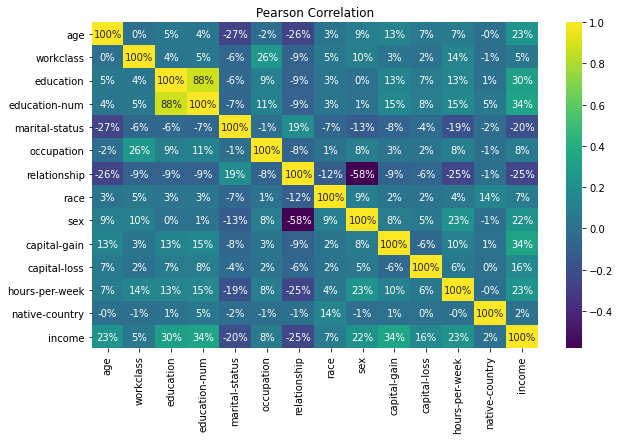

In [340]:
#visualize the correlation
plot.figure(figsize = (10,6))
sns.heatmap(df.corr(), annot = True,fmt='.0%' ,cmap = 'viridis')
plot.title("Pearson Correlation")
plot.show()



In [341]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
x = df.iloc[:,:-1]
x.columns
y = df['income']

#elimnating the income values and considering only features variables

In [342]:
from sklearn import preprocessing
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'species'.
y= label_encoder.fit_transform(y) 


In [343]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]
  
print(vif_data)

           feature        VIF
0              age   3.691873
1        workclass   8.466753
2        education  13.374335
3    education-num  50.372875
4   marital-status   4.014065
5       occupation   3.697318
6     relationship   2.664314
7             race  17.245690
8              sex   4.454518
9     capital-gain   1.132226
10    capital-loss   1.063069
11  hours-per-week  11.860856
12  native-country  19.880354


In [344]:
x.drop('education-num', axis=1,inplace = True)

In [345]:
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]
  
print(vif_data)

           feature        VIF
0              age   3.651458
1        workclass   8.349267
2        education   3.408691
3   marital-status   3.942795
4       occupation   3.669883
5     relationship   2.593547
6             race  16.600746
7              sex   4.408007
8     capital-gain   1.127415
9     capital-loss   1.062049
10  hours-per-week  11.272513
11  native-country  17.867519


In [346]:
import sklearn as sk
from sklearn import metrics
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.30,random_state=123)


In [33]:
# Grid search cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid=[{"C":[1,2,3], "solver" : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
      "max_iter" : [2500,5000]}]# l1 lasso l2 ridge
# grid=[{"solver" : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
#       "max_iter" : [2500,5000]}]# l1 lasso l2 ridge
LR=LogisticRegression()
LR_cv=GridSearchCV(LR,grid,cv=5)
LR_cv.fit(train_features,train_targets)

print("tuned hpyerparameters :(best parameters) ",LR_cv.best_params_)
print("accuracy :",LR_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 3, 'max_iter': 2500, 'solver': 'lbfgs'}
accuracy : 0.8171286783463383


In [35]:
# Import MLPClassifer 
from sklearn.neural_network import MLPClassifier

# Create model object
clf = MLPClassifier(hidden_layer_sizes=(6,5),
                    max_iter = 35,
                    activation='relu',
                    solver ='sgd',
                    random_state=762,
                    verbose=True,
                    learning_rate = 'invscaling',
                    learning_rate_init=0.01)

# Fit data onto the model
clf.fit(train_features,train_targets)


Iteration 1, loss = 0.83391051
Iteration 2, loss = 0.55349666
Iteration 3, loss = 0.55349309
Iteration 4, loss = 0.55349057
Iteration 5, loss = 0.55348854
Iteration 6, loss = 0.55348674
Iteration 7, loss = 0.55348512
Iteration 8, loss = 0.55348363
Iteration 9, loss = 0.55348229
Iteration 10, loss = 0.55348108
Iteration 11, loss = 0.55347993
Iteration 12, loss = 0.55347884
Iteration 13, loss = 0.55347783
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(hidden_layer_sizes=(6, 5), learning_rate='invscaling',
              learning_rate_init=0.01, max_iter=35, random_state=762,
              solver='sgd', verbose=True)

In [36]:
# Import accuracy score 
from sklearn.metrics import accuracy_score
import numpy as np
# Make prediction on test dataset
prediction=clf.predict(X_test)
score = np.round(metrics.accuracy_score(y_test,prediction),2)
print("Mean accuracy of predictions:" +str(score))
# Calcuate accuracy
# accuracy_score(y_test,ypred)

Mean accuracy of predictions:0.76


In [38]:
print("Feature matrix:", X_train.shape)
print("Target matrix:",X_test.shape)
print("Feature matrix:", y_train.shape)
print("Target matrix:", y_test.shape)

Feature matrix: (22792, 12)
Target matrix: (9768, 12)
Feature matrix: (22792,)
Target matrix: (9768,)


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier


import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error



In [40]:
num_instances = len(x)

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('L_SVM', LinearSVC()))
models.append(('SGDC', SGDClassifier()))

# Evaluations
results = []
names = []

for name, model in models:
    # Fit the model
    model.fit(train_features,train_targets)
    
    predictions = model.predict(test_features)
    
    # Evaluate the model
    score = accuracy_score(test_targets, predictions)
    mse = mean_squared_error(predictions, test_targets)
    # print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    results.append(mse)
    names.append(name)
    
    msg = "%s: %f (%f)" % (name, score, mse)
    print(msg)
    

/Users/pushpanb/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR: 0.820639 (0.179361)
LDA: 0.823608 (0.176392)
KNN: 0.827396 (0.172604)
CART: 0.816134 (0.183866)
NB: 0.820332 (0.179668)
SVM: 0.819615 (0.180385)


/Users/pushpanb/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


L_SVM: 0.789926 (0.210074)
SGDC: 0.811118 (0.188882)


### K fold cross validation

In [41]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm

In [96]:
# evaluate a logistic regression model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
# # create dataset
# X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = LogisticRegression()
# evaluate model
scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.816 (0.006)


In [45]:
# grid search total epochs for the perceptron
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import Perceptron
# define dataset
# X, y = make_classification(n_samples=1000, n_features=10, n_informative=10, n_redundant=0, random_state=1)
# define model
model = Perceptron(eta0=0.0001)
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['max_iter'] = [1, 10, 100, 1000, 10000]
# define search
search = GridSearchCV(model, grid, scoring='accuracy', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(train_features, train_targets)
# summarize
print('Mean Accuracy: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)
# summarize all
means = results.cv_results_['mean_test_score']
params = results.cv_results_['params']
for mean, param in zip(means, params):
    print(">%.3f with: %r" % (mean, param))

Mean Accuracy: 0.740
Config: {'max_iter': 1}
>0.740 with: {'max_iter': 1}
>0.728 with: {'max_iter': 10}
>0.728 with: {'max_iter': 100}
>0.728 with: {'max_iter': 1000}
>0.728 with: {'max_iter': 10000}


/Users/pushpanb/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


In [347]:
#Code written by V Sharmanska. All rights reserved.
#STEP 1: Import the AIF360 library and set the random seed.
import numpy as np
from aif360.datasets import AdultDataset
from aif360.algorithms.preprocessing.optim_preproc_helpers.data_preproc_functions import load_preproc_data_adult
from aif360.metrics import ClassificationMetric
from aif360.algorithms.preprocessing.reweighing import Reweighing
import pdb
from sklearn.preprocessing import StandardScaler  #MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import *

np.random.seed(0)

In [348]:
#STEP 2: We define where's the bias in the features of our dataset.

privileged_groups = [{'sex': 1}]
unprivileged_groups = [{'sex': 0}]
dataset_orig = load_preproc_data_adult(['sex'])


#STEP 3: We split between training and test set.
train, test = dataset_orig.split([0.7], shuffle=True)
print("training data size", train.features.shape)
print("dataset feature names", train.feature_names)

#Normalize the dataset, both train and test. This should always be done in any machine learning pipeline!
scale_orig = StandardScaler()
X_train = scale_orig.fit_transform(train.features)
y_train = train.labels

X_test = scale_orig.transform(test.features) 
y_test = test.labels.ravel()

training data size (34189, 18)
dataset feature names ['race', 'sex', 'Age (decade)=10', 'Age (decade)=20', 'Age (decade)=30', 'Age (decade)=40', 'Age (decade)=50', 'Age (decade)=60', 'Age (decade)=>=70', 'Education Years=6', 'Education Years=7', 'Education Years=8', 'Education Years=9', 'Education Years=10', 'Education Years=11', 'Education Years=12', 'Education Years=<6', 'Education Years=>12']


In [350]:
#We use a simple Logistic Regression to parametrise our classifier. 
#You can try different classifiers and hyperparameters, checking how the metrics will change.

learner = LogisticRegression(solver='liblinear', random_state=1)  
learner.fit(X_train,y_train.ravel())
predictions = learner.predict(X_test)

test_pred = test.copy()
test_pred.labels = predictions
print("Accuracy", sum(predictions==y_test)/len(y_test))
metric = ClassificationMetric(test, test_pred, unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
metric_arrs = {}
metric_arrs['stat_par_diff']=(metric.statistical_parity_difference())
metric_arrs['eq_opp_diff']=(metric.equal_opportunity_difference())
metric_arrs['avg_odds_diff']=(metric.average_odds_difference())
metric_arrs['bal_acc']=((metric.true_positive_rate() + metric.true_negative_rate()) / 2)
metric_arrs['disp_imp']=(metric.disparate_impact())
print(metric_arrs)


Accuracy 0.8042039172865625
{'stat_par_diff': -0.20557244174265452, 'eq_opp_diff': -0.4414141414141414, 'avg_odds_diff': -0.27273605621431707, 'bal_acc': 0.657262071666589, 'disp_imp': 0.0}


In [357]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, random_state=None, shuffle=False)

i=0
c = [1.0, 100000., 0.001, 0.000001,10]
max_iter = [ 500,1000,2500,3500,5000 ]
# penalty = ['l1', 'l2', 'elasticnet', 'none']
# enumerate splits
x_train_np = np.array(X_train)
y_train_np = np.array(y_train)
for train_ix, test_ix in kf.split(X_train):
    x_tr, x_test = x_train_np[train_ix], x_train_np[test_ix]
    y_tr, y_test = y_train_np[train_ix], y_train_np[test_ix]
    model = LogisticRegression(solver='liblinear', random_state=1,max_iter = max_iter[i], C = c[i])
    model.fit(x_tr, y_tr.ravel())
    preds = model.predict(x_test)
    test_pred = train.copy().subset(test_ix)
    test_pred.labels = preds
#     results = a accuracy_score(y_true, y_pred, normalize=False)
    print("Accuracy", sum(preds==y_test)/len(y_test),"c-value:",c[i], "max_iter :" ,max_iter[i] )
    scores = cross_val_score(model, x_tr, y_tr.ravel(), scoring='accuracy', cv=kf, n_jobs=-1)
    print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
    metric = ClassificationMetric(train.subset(test_ix), test_pred, unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
    metric_arrs = {}
    metric_arrs['stat_par_diff']=(metric.statistical_parity_difference())
    metric_arrs['eq_opp_diff']=(metric.equal_opportunity_difference())
    metric_arrs['avg_odds_diff']=(metric.average_odds_difference())
    metric_arrs['bal_acc']=((metric.true_positive_rate() + metric.true_negative_rate()) / 2)
    metric_arrs['disp_imp']=(metric.disparate_impact())
    print(metric_arrs)
    i+=1

Accuracy [0.24173735 0.24173735 0.24173735 ... 0.75826265 0.75826265 0.24173735] c-value: 1.0 max_iter : 500
Mean Accuracy: 0.805 (0.004)
{'stat_par_diff': -0.22672872340425532, 'eq_opp_diff': -0.470203488372093, 'avg_odds_diff': -0.2950507237778832, 'bal_acc': 0.6594463413880026, 'disp_imp': 0.0}
Accuracy [0.76162621 0.76162621 0.76162621 ... 0.76162621 0.76162621 0.76162621] c-value: 100000.0 max_iter : 1000
Mean Accuracy: 0.804 (0.007)
{'stat_par_diff': -0.21979938944614041, 'eq_opp_diff': -0.4654676258992806, 'avg_odds_diff': -0.28921065900721227, 'bal_acc': 0.6638080395427516, 'disp_imp': 0.0}
Accuracy [0.23427903 0.76572097 0.76572097 ... 0.76572097 0.76572097 0.76572097] c-value: 0.001 max_iter : 2500
Mean Accuracy: 0.802 (0.006)
{'stat_par_diff': -0.2099737532808399, 'eq_opp_diff': -0.46691176470588236, 'avg_odds_diff': -0.2840474141088565, 'bal_acc': 0.6671546214672454, 'disp_imp': 0.0}
Accuracy [0.75636151 0.24363849 0.75636151 ... 0.75636151 0.75636151 0.75636151] c-value: 1

In [366]:
# learner = LogisticRegression(solver='liblinear', random_state=1, max_iter = 5000, C = 10)  
#We use a simple Logistic Regression to parametrise our classifier. 
#You can try different classifiers and hyperparameters, checking how the metrics will change.

learner = LogisticRegression(solver='liblinear', random_state=1, max_iter = 5000, C = 10)  
learner.fit(X_train,y_train.ravel())
predictions = learner.predict(X_test)

test_pred = test.copy()
test_pred.labels = predictions
print("Accuracy", sum(predictions==y_test)/len(y_test))
scores = cross_val_score(learner, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
metric = ClassificationMetric(test, test_pred, unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
metric_arrs = {}
metric_arrs['stat_par_diff']=(metric.statistical_parity_difference())
metric_arrs['eq_opp_diff']=(metric.equal_opportunity_difference())
metric_arrs['avg_odds_diff']=(metric.average_odds_difference())
metric_arrs['bal_acc']=((metric.true_positive_rate() + metric.true_negative_rate()) / 2)
metric_arrs['disp_imp']=(metric.disparate_impact())
print(metric_arrs)

Accuracy [0.75515577 0.24484423 0.75515577 ... 0.24484423 0.75515577 0.24484423]
Mean Accuracy: 0.819 (0.006)
{'stat_par_diff': -0.20557244174265452, 'eq_opp_diff': -0.4414141414141414, 'avg_odds_diff': -0.27273605621431707, 'bal_acc': 0.657262071666589, 'disp_imp': 0.0}


In [369]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, random_state=None, shuffle=False)

i=0
c = [1.0, 100000., 0.001, 0.000001,1000]
max_iter = [ 500,1000,2500,3500,5000 ]
# penalty = ['l1', 'l2', 'elasticnet', 'none']
# enumerate splits
x_train_np = np.array(X_train)
y_train_np = np.array(y_train)
for train_ix, test_ix in kf.split(X_train):
    x_tr, x_test = x_train_np[train_ix], x_train_np[test_ix]
    y_tr, y_test = y_train_np[train_ix], y_train_np[test_ix]
    RW = Reweighing(unprivileged_groups=unprivileged_groups,
                privileged_groups=privileged_groups)
    train = RW.fit_transform(train)
    model = LogisticRegression(solver='liblinear', random_state=1,max_iter = max_iter[i], C = c[i])
    model.fit(x_tr, y_tr.ravel())
    preds = model.predict(x_test)
    test_pred = train.copy().subset(test_ix)
    test_pred.labels = preds
#     results = a accuracy_score(y_true, y_pred, normalize=False)
    print("Accuracy", sum(preds==y_test)/len(y_test),"c-value:",c[i], "max_iter :" ,max_iter[i] )
    scores = cross_val_score(model, x_tr, y_tr.ravel(), scoring='accuracy', cv=kf, n_jobs=-1)
    print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
    metric = ClassificationMetric(train.subset(test_ix), test_pred, unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
    metric_arrs = {}
    metric_arrs['stat_par_diff']=(metric.statistical_parity_difference())
    metric_arrs['eq_opp_diff']=(metric.equal_opportunity_difference())
    metric_arrs['avg_odds_diff']=(metric.average_odds_difference())
    metric_arrs['bal_acc']=((metric.true_positive_rate() + metric.true_negative_rate()) / 2)
    metric_arrs['disp_imp']=(metric.disparate_impact())
    print(metric_arrs)
    i+=1

Accuracy [0.24173735 0.24173735 0.24173735 ... 0.75826265 0.75826265 0.24173735] c-value: 1.0 max_iter : 500
Mean Accuracy: 0.805 (0.004)
{'stat_par_diff': -0.20416048886477262, 'eq_opp_diff': -0.470203488372093, 'avg_odds_diff': -0.2950507237778832, 'bal_acc': 0.6121531923053463, 'disp_imp': 0.0}
Accuracy [0.76162621 0.76162621 0.76162621 ... 0.76162621 0.76162621 0.76162621] c-value: 100000.0 max_iter : 1000
Mean Accuracy: 0.804 (0.007)
{'stat_par_diff': -0.19718017506175772, 'eq_opp_diff': -0.46546762589928065, 'avg_odds_diff': -0.28921065900721227, 'bal_acc': 0.6204324009084153, 'disp_imp': 0.0}
Accuracy [0.23427903 0.76572097 0.76572097 ... 0.76572097 0.76572097 0.76572097] c-value: 0.001 max_iter : 2500
Mean Accuracy: 0.802 (0.006)
{'stat_par_diff': -0.18679627286080555, 'eq_opp_diff': -0.46691176470588236, 'avg_odds_diff': -0.2840474141088565, 'bal_acc': 0.6233388018621966, 'disp_imp': 0.0}
Accuracy [0.75636151 0.24363849 0.75636151 ... 0.75636151 0.75636151 0.75636151] c-value:

In [371]:
learner = LogisticRegression(solver='liblinear', random_state=1, max_iter = 5000, C = 1000)  
learner.fit(X_train,y_train.ravel())
predictions = learner.predict(X_test)

test_pred = test.copy()
test_pred.labels = predictions
print("Accuracy", sum(predictions==y_test)/len(y_test))
scores = cross_val_score(learner, X_train, y_train.ravel(), scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
metric = ClassificationMetric(test, test_pred, unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
metric_arrs = {}
metric_arrs['stat_par_diff']=(metric.statistical_parity_difference())
metric_arrs['eq_opp_diff']=(metric.equal_opportunity_difference())
metric_arrs['avg_odds_diff']=(metric.average_odds_difference())
metric_arrs['bal_acc']=((metric.true_positive_rate() + metric.true_negative_rate()) / 2)
metric_arrs['disp_imp']=(metric.disparate_impact())
print(metric_arrs)

Accuracy [0.75515577 0.24484423 0.75515577 ... 0.24484423 0.75515577 0.24484423]
Mean Accuracy: 0.804 (0.004)
{'stat_par_diff': -0.20557244174265452, 'eq_opp_diff': -0.4414141414141414, 'avg_odds_diff': -0.27273605621431707, 'bal_acc': 0.657262071666589, 'disp_imp': 0.0}
